# PROJECT PYTHON FOR DATA ANALYSIS
## **MACHINE LEARNING**

### **Import main needed libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

### **Dataset preparation**

In [2]:
demographic_columns = ["Age","Gender","Education","Country","Ethnicity"]
personality_columns = ["Nscore","Escore","Oscore","Ascore","Cscore","Impulsive","Sensation Seeking"]
feature_columns = demographic_columns + personality_columns
drugs_columns = ["Alcohol","Amphetamines","Amyl nitrite","Benzodiazepine","Caffeine","Cannabis","Chocolate","Cocaine","Crack","Ecstasy","Heroin","Ketamine","Legal highs","LSD","Methadone","Mushrooms","Nicotine","Fictitious drug Semeron","Volatile Substance Abuse"]
drugs_legal = ['Alcohol', 'Caffeine', 'Chocolate', 'Nicotine']
drugs_illegal = [drug for drug in drugs_columns if drug not in drugs_legal]
all_columns = feature_columns + drugs_columns

### Loading the dataset

In [3]:
df = pd.read_csv("drug_consumption.data",names=all_columns,header=None)
df.reset_index(drop=True,inplace=True)
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legal highs,LSD,Methadone,Mushrooms,Nicotine,Fictitious drug Semeron,Volatile Substance Abuse
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


### Nominal drug to ordinal data

In [4]:
df_NomToOrd = df.copy()
for i in drugs_columns:
    df_NomToOrd[i] = df_NomToOrd[i].map({'CL0': 0, 'CL1': 1, 'CL2': 2, 'CL3': 3, 'CL4': 4, 'CL5': 5, 'CL6': 6})
df_NomToOrd.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legal highs,LSD,Methadone,Mushrooms,Nicotine,Fictitious drug Semeron,Volatile Substance Abuse
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,2,0,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,4,0,2,0,2,3,0,4,0,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,1,0,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,2,0,0,0,0,2,0,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,1,0,0,1,0,0,2,2,0,0


<div class="alert alert-block alert-info">
    For the machine learning models to work, we need to change the categorical data to numerical, by assigning a number to the corresponding class (i.e. CL0-->0, CL1-->1, ..., CL6-->6).
    We keep this dataframe into a new one called <code>df_NomToOrd</code>.    
</div>

### Removing Semeron users

In [5]:
semerons = df_NomToOrd[df_NomToOrd['Fictitious drug Semeron'] != 0]
df_noFake = df_NomToOrd[df_NomToOrd['Fictitious drug Semeron'] == 0]
# Removing it from drug lists
drugs_columns.remove('Fictitious drug Semeron')
drugs_illegal.remove('Fictitious drug Semeron')
# Dropping the column from the dataset
df_noFake = df_noFake.drop(columns='Fictitious drug Semeron')
df_noFake.reset_index(drop=True,inplace=True)
df_noFake.shape

(1877, 30)

<div class="alert alert-block alert-info">
    We store in a new variable called <code>df_noFake</code> the data from which we removed the fictitious "Semeron" drug column and all the individuals who claimed to have consumed it. We will use this new dataframe for the machine learning models.
</div>

### **Machine Learning Models**

### Building the predictive dataframe

In [6]:
X = df_noFake.copy().drop(df_noFake[drugs_columns], axis=1)
X.drop(["Country","Gender","Ethnicity"],axis=1,inplace=True) # Biased variables
X.head()

,Age,Education,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,Sensation Seeking
0,0.49788,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.07854,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,0.49788,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.95197,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.49788,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575


<div class="alert alert-block alert-info">
    <b>Remark:</b><br>
    According to the results that we obtained from the data visualization, we have decided to remove the variables <code>Country</code>, <code>Ethnicity</code> and <code>Gender</code> from the predictive variables are they bring too much biais to the information.
</div>

### Multilabel Classification

<div class="alert alert-block alert-info">
    At first, we were looking for a model that could predict multiple labels for one observation: in this case, predict all the drugs that an individual would probably take. 
    To do so, we used a multilabel classification model from <code>sklearn.multioutput</code>.
</div>

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

def PredictTakenDrugs(X,df_noFake,drugs):
    # Prepare data
    outputs=df_noFake[drugs]
    y_multiclass = outputs.copy()
    for i in range(len(y_multiclass)):
        for drug in drugs:
            if y_multiclass.loc[i,drug]>0:
                y_multiclass.loc[i,drug]=1
            else:
                y_multiclass.loc[i,drug]=0
                
    # Split dataset into train and test set
    X_train,X_test,y_train,y_test=train_test_split(X,y_multiclass,test_size=0.2,random_state=9)            
    # Build multi_label_Classifier
    rfc_ml_clf = RandomForestClassifier(n_estimators=200,random_state=4)
    multi_label_clf = MultiOutputClassifier(rfc_ml_clf)
    multi_label_clf.fit(X_train,y_train)
    y_pred = multi_label_clf.predict(X_test)    
    score_cm = accuracy_score(y_test, y_pred)
    return score_cm,multi_label_clf

<div class="alert alert-block alert-info">
    <b>Explanation:</b><br>
    <li>The parameter <code>drugs</code> allow us to chose which drugs to predict from the model.</li>
    <li>We binarise the outputs for the drugs that we need to predict: 1 if the user has already consumed this drug, 0 if never.</li>
    </div>

In [8]:
print(f"Accuracy score for multilabel classification on legal drugs: {PredictTakenDrugs(X,df_noFake,drugs_legal)[0]*100:.2f}%")
print(f"Accuracy score for multilabel classification on illegal drugs: {PredictTakenDrugs(X,df_noFake,drugs_illegal)[0]*100:.2f}%")
print(f"Accuracy score for multilabel classification on all drugs: {PredictTakenDrugs(X,df_noFake,drugs_columns)[0]*100:.2f}%")

Accuracy score for multilabel classification on legal drugs: 75.27%
Accuracy score for multilabel classification on illegal drugs: 9.84%
Accuracy score for multilabel classification on all drugs: 5.85%


<div class="alert alert-block alert-info">
    <b>Analysis:</b><br>
    <li>We observe that for a few labels to predict (4 with <code>drugs_legal</code>), the model is quite efficient.</li>
    <li>But for a larger number of labels (18 with <code>drugs_columns</code>), the model is poorly accurate. This is due to the fact that it is more difficult for the model to predict the exact same sequence of 18 correct outputs than for a fewer amount.</li>    
</div>

In [38]:
_,mod = PredictTakenDrugs(X,df_noFake,drugs_columns)

In [39]:
I_drug=[-0.95197,-2.43591,2,2,2,-2,-2,2,2]
I_notDrug=[2.59171,1.98437,-2,-2,-2,2,2,-2,-2]
I_lambda=[-0.07854,-0.05921,0,0,0,0,0,0,0]
df_test = pd.DataFrame([I_drug,I_notDrug,I_lambda],columns=X.columns.values)
df_test
pred_test = mod.predict(df_test)

print("Outputs obtained for different type of users:")
print(f"Individual likely to use drugs: {pred_test[0]}")
print(f"Individual likely to use no drugs: {pred_test[1]}")
print(f"Lambda Individual likely to use some drugs: {pred_test[2]}")

<div class="alert alert-block alert-info">
    We tried the reliability of the model by giving it some manually made individuals for which we knew what the expected output would be.
</div>

### Binarization of the outputs


<div class="alert alert-block alert-info">
    <b>Problem:</b><br>
    <b>Use of ML models to predict if a given user has recently (in the last month: CL4, CL5 or CL6) consumed any illegal drugs.</b><br>
    <li>To binarise the output values, we changed the values from the <code>drugs_illegal</code> columns to 1 if the class of the last use of the drug is greater or equal than class 4, and 0 if it is lower than class 4.</li>
    <li>Then, we created a new vector stating 1 if the user has recently used illegal drugs, and 0 if not, based on the number of illegal drugs they consumed, which is fixed here as 1.</li>
</div>

In [11]:
# Binarization for recent/non-recent
outputs = df_noFake[drugs_illegal]
bin_outputs = outputs.copy()
for i in range(len(bin_outputs)):
    for drug in drugs_illegal:
        if bin_outputs.loc[i,drug]>3:
            bin_outputs.loc[i,drug]=1
        else:
            bin_outputs.loc[i,drug]=0
bin_outputs   

,Amphetamines,Amyl nitrite,Benzodiazepine,Cannabis,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legal highs,LSD,Methadone,Mushrooms,Volatile Substance Abuse
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1873,0,0,0,0,0,0,0,0,0,0,1,1,1,0
1874,1,1,1,1,1,0,1,0,0,0,0,0,0,0
1875,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [12]:
recent_user = [1 if bin_outputs.loc[i].sum() > 1 else 0 for i in range(len(bin_outputs)) ]

### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

def IsRecentUserPrediction_LogReg(X,y):
    # For 1 drug at a time. Need to manually change the value
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

    reg_log = LogisticRegression()
    reg_log.fit(X_train, y_train)
    y_pred = reg_log.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    score_cm = accuracy_score(y_test, y_pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(f"Is a recent user? \nAccuracy score: {score_cm*100:.2f}%")   
    
    return score_cm,reg_log
   

### LDA

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

def IsRecentUserPrediction_LDA(X,y):
 # For 1 drug at a time. Need to manually change the value
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

    clf = LDA()
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    score_cm = accuracy_score(y_test, y_pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(f"Is a recent user? \nAccuracy score: {score_cm*100:.2f}%")
    
    return score_cm,clf

### Random Forest Classifier

In [15]:
def IsRecentUserPrediction_RFC(X,y):
 # For 1 drug at a time. Need to manually change the value
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

    clf = RandomForestClassifier(n_estimators=200,random_state=1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    score_cm = accuracy_score(y_test, y_pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(f"Is a recent user? \nAccuracy score: {score_cm*100:.2f}%")
    
    return score_cm,clf

### SVC

In [16]:
from sklearn import svm

def IsRecentUserPrediction_SVC(X,y):
 # For 1 drug at a time. Need to manually change the value
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

    clf = svm.SVC()
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    score_cm = accuracy_score(y_test, y_pred)    
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(f"Is a recent user? \nAccuracy score: {score_cm*100:.2f}%")
    
    return score_cm,clf

### KNN

In [17]:
import plotly.express as px
from sklearn.neighbors import KNeighborsClassifier

def IsRecentUserPrediction_KNN(X,y):
 # For 1 drug at a time. Need to manually change the value
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

    clf = KNeighborsClassifier(10)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    score_cm = accuracy_score(y_test, y_pred)    
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(f"Is a recent user? \nAccuracy score: {score_cm*100:.2f}%")
    
    return score_cm,clf

### XGBoost Classifier

In [18]:
import xgboost as xgb

def IsRecentUserPrediction_XGB(X,y):
 # For 1 drug at a time. Need to manually change the value
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)

    clf = xgb.XGBClassifier(random_state=42,gpu_id=0,use_label_encoder=False) # build classifier
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    score_cm = accuracy_score(y_test, y_pred)    
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(f"Is a recent user? \nAccuracy score: {score_cm*100:.2f}%")
    
    return score_cm,clf

[17:07:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


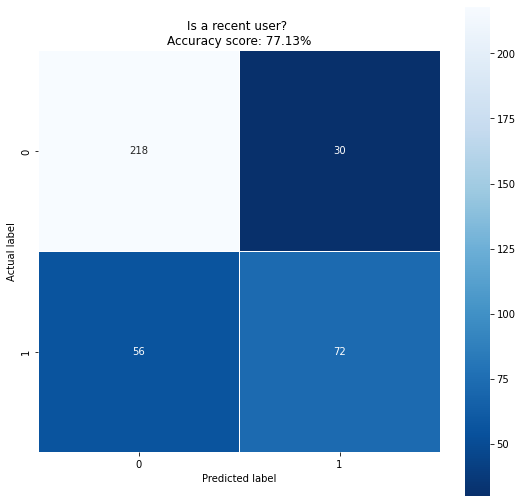

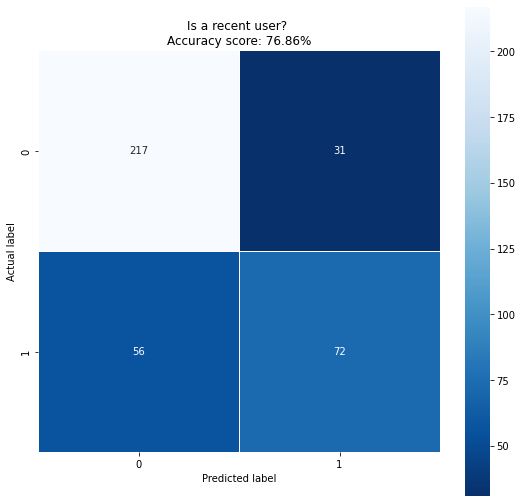

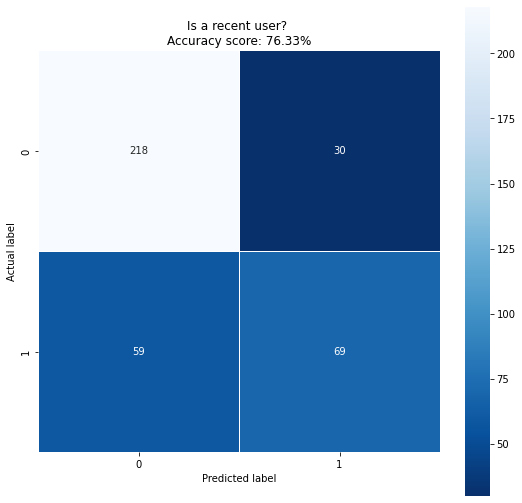

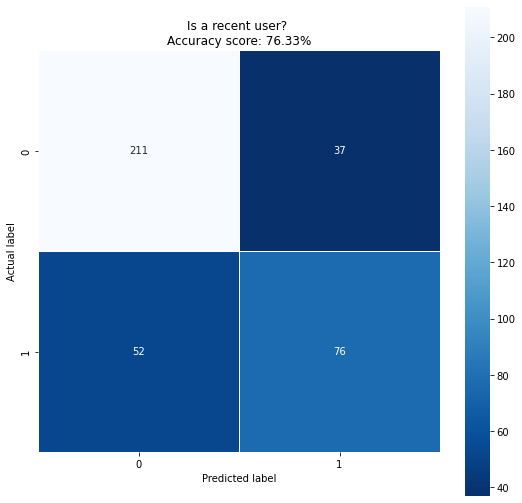

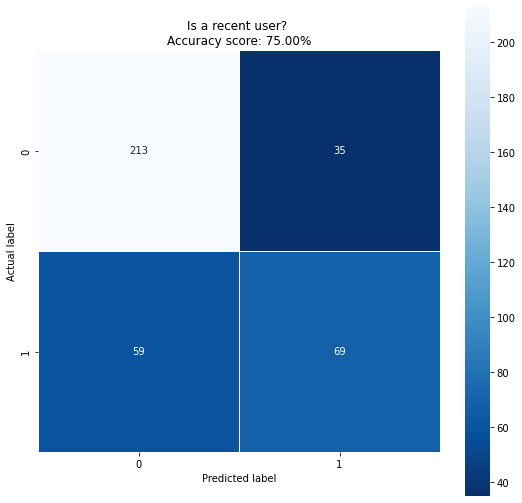

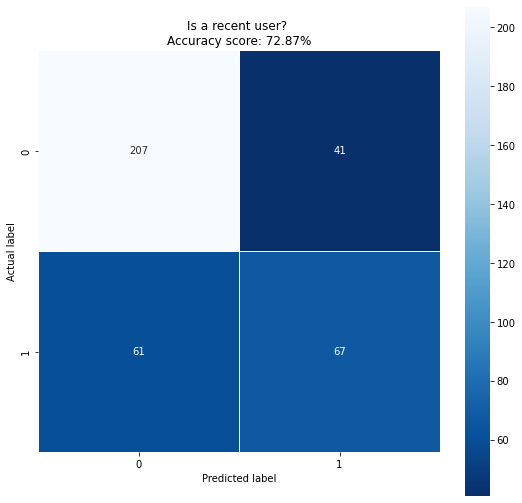

In [19]:
clf_scores = {}

clf_scores["LogReg"], lg_mod = IsRecentUserPrediction_LogReg(X,recent_user)
clf_scores["LDA"], lda_clf = IsRecentUserPrediction_LDA(X,recent_user)
clf_scores["RFC"], rfc_clf = IsRecentUserPrediction_RFC(X,recent_user)
clf_scores["SVC"], svc_clf = IsRecentUserPrediction_SVC(X,recent_user)
clf_scores["KNN"], knn_clf = IsRecentUserPrediction_KNN(X,recent_user)
clf_scores["XGB"], xgb_mod = IsRecentUserPrediction_XGB(X,recent_user)   

In [20]:
clf_scores

{'LogReg': 0.7712765957446809,
 'LDA': 0.7686170212765957,
 'RFC': 0.7632978723404256,
 'SVC': 0.7632978723404256,
 'KNN': 0.75,
 'XGB': 0.7287234042553191}

<div class="alert alert-block alert-info">
    <b>Analysis:</b><br>
    <li> </li>
    
</div>


### Explainable AI

In [21]:
import shap
shap.initjs()

model=xgb_mod
#def ExplainAI(X,model):
# Generate the Tree explainer and SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
expected_value = explainer.expected_value

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


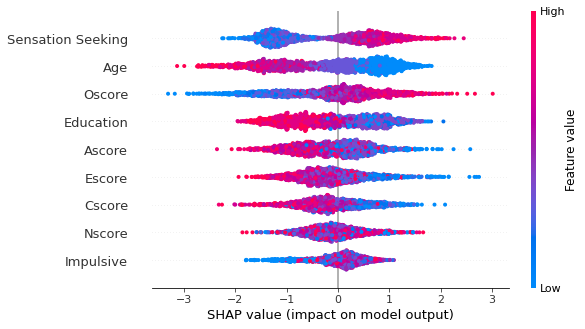

In [22]:
############## visualizations #############
# Generate summary dot plot
shap.summary_plot(shap_values, X,title="SHAP summary plot") 

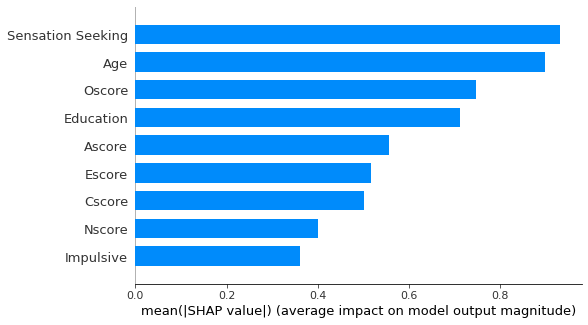

In [23]:
# Generate summary bar plot 
shap.summary_plot(shap_values, X,plot_type="bar") 

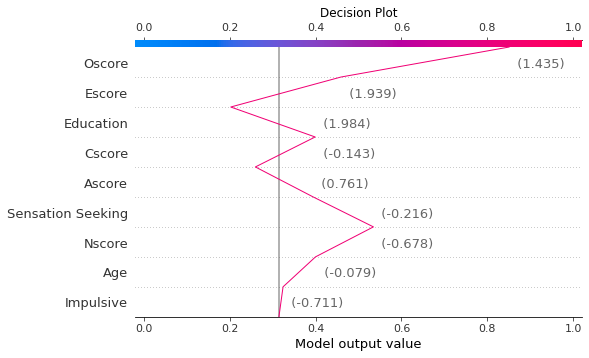

In [28]:
# Generate Decision plot 
indiv_index=1
shap.decision_plot(expected_value, shap_values[indiv_index,:],features=X.loc[indiv_index,:],link='logit', feature_names=(X.columns.tolist()),show=True,title="Decision Plot")